<a href="https://colab.research.google.com/github/Hyun-ho-Lee/machine-learning-with/blob/main/5%EC%9E%A5_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

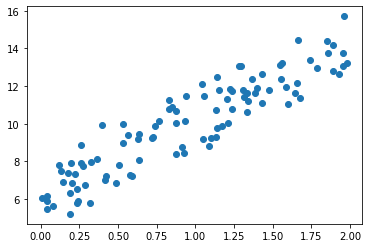

In [ ]:
np.random.seed(0)
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)
plt.scatter(X,y)

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격

bostonDF['PRICE']=boston.target
print('Boston 데이터 세트의 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트의 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


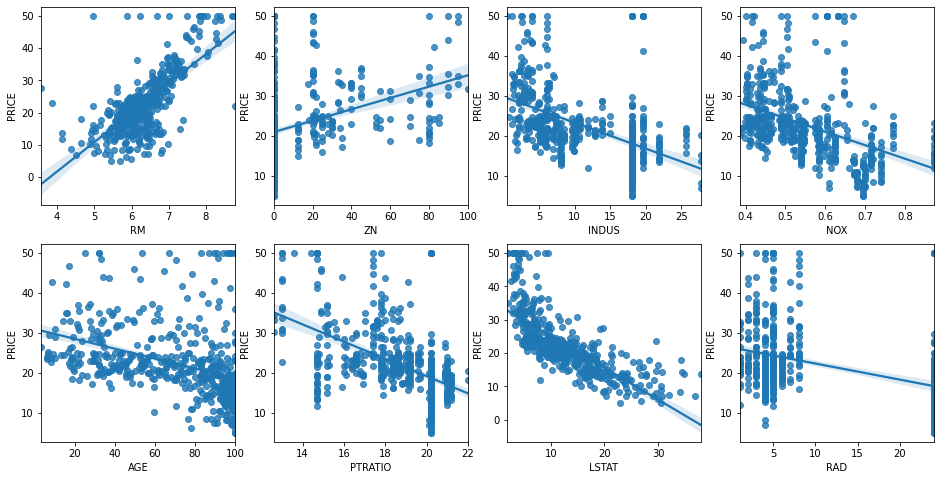

In [ ]:
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target = bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test= train_test_split(X_data,y_target,test_size=0.3
                                                ,random_state=156)

#OLS로 학습/예측/평가

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f},RMSE :{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.297,RMSE :4.159
Variance score : 0.757


In [ ]:
print('절편값 :',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편값 : 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

#cross_val_score() 로 5 fold setting 

neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#cross_val_score()로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE score:',np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE score:',np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE score: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE score: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE:5.829


In [ ]:

from sklearn.preprocessing import PolynomialFeatures

# [[0,1], [2,3]]의 matrix 생성
X = np.arange(4).reshape(2,2)
print('변경 전: \n', X)

# PolynomialFeatures 클래스를 이용해 2차 다항식으로 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('\n변경 후: \n',poly_ftr)

변경 전: 
 [[0 1]
 [2 3]]

변경 후: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
# 3차 다항식을 구하는 함수 생성 예시

def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0] ** 2 + 4 * X[:,1] ** 3
    return y

X = np.arange(0,4).reshape(2,2)
print('1차 단항식: \n ', X)
y = polynomial_func(X)
print('3차 다항식: \n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후, 회귀계수 check
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape: ', model.coef_.shape)

1차 단항식: 
  [[0 1]
 [2 3]]
3차 다항식: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape:  (10,)
